In [4]:
!pip install optimum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.1/407.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.4 MB/s eta 0:00:00


In [3]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

Overview

Bark is a transformer-based text-to-speech model proposed by Suno AI in suno-ai/bark.

Bark is made of 4 main models:

BarkSemanticModel (also referred to as the ‘text’ model): a causal auto-regressive transformer model that takes as input tokenized text, and predicts semantic text tokens that capture the meaning of the text.
BarkCoarseModel (also referred to as the ‘coarse acoustics’ model): a causal autoregressive transformer, that takes as input the results of the BarkSemanticModel model. It aims at predicting the first two audio codebooks necessary for EnCodec.
BarkFineModel (the ‘fine acoustics’ model), this time a non-causal autoencoder transformer, which iteratively predicts the last codebooks based on the sum of the previous codebooks embeddings.
having predicted all the codebook channels from the EncodecModel, Bark uses it to decode the output audio array.

It should be noted that each of the first three modules can support conditional speaker embeddings to condition the output sound according to specific predefined voice.

This model was contributed by Yoach Lacombe (ylacombe) and Sanchit Gandhi (sanchit-gandhi). The original code can be found here.
Optimizing Bark

Bark can be optimized with just a few extra lines of code, which significantly reduces its memory footprint and accelerates inference.
Using half-precision

You can speed up inference and reduce memory footprint by 50% simply by loading the model in half-precision

In [1]:
from transformers import BarkModel
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
model = BarkModel.from_pretrained("suno/bark-small", torch_dtype=torch.float16).to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


 Using CPU offload

As mentioned above, Bark is made up of 4 sub-models, which are called up sequentially during audio generation. In other words, while one sub-model is in use, the other sub-models are idle.

If you’re using a CUDA device, a simple solution to benefit from an 80% reduction in memory footprint is to offload the submodels from GPU to CPU when they’re idle. This operation is called CPU offloading. You can use it with one line of code as follows:

In [2]:
model.enable_cpu_offload()

Note that 🤗 Accelerate must be installed before using this feature. Here’s how to install it.
Using Better Transformer

Better Transformer is an 🤗 Optimum feature that performs kernel fusion under the hood. You can gain 20% to 30% in speed with zero performance degradation. It only requires one line of code to export the model to 🤗 Better Transformer:

In [3]:
model =  model.to_bettertransformer()

The BetterTransformer implementation does not support padding during training, as the fused kernels do not support attention masks. Beware that passing padded batched data during training may result in unexpected outputs. Please refer to https://huggingface.co/docs/optimum/bettertransformer/overview for more details.


Note that 🤗 Optimum must be installed before using this feature. Here’s how to install it.
Using Flash Attention 2

Flash Attention 2 is an even faster, optimized version of the previous optimization.
Installation

First, check whether your hardware is compatible with Flash Attention 2. The latest list of compatible hardware can be found in the official documentation. If your hardware is not compatible with Flash Attention 2, you can still benefit from attention kernel optimisations through Better Transformer support covered above.

Next, install the latest version of Flash Attention 2:

In [4]:
!pip install -U flash-attn --no-build-isolation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 23.8 MB/s eta 0:00:00
  Created wheel for flash-attn: filename=flash_attn-2.5.6-cp310-cp310-linux_x86_64.whl size=120592258 sha256=d8cf54adda65f59820221d329d274e124972d7fdc05ab3b1130253c64eee6c8a
  Stored in directory: /root/.cache/pip/wheels/a8/1c/88/b959d6818b98a46d61ba231683abb7523b89ac1a7ed1e0c206
Successfully built flash-attn


Usage

To load a model using Flash Attention 2, we can pass the attn_implementation="flash_attention_2" flag to .from_pretrained. We’ll also load the model in half-precision (e.g. torch.float16), since it results in almost no degradation to audio quality but significantly lower memory usage and faster inference:

In [4]:
model = BarkModel.from_pretrained("suno/bark-small", torch_dtype=torch.float16, attn_implementation="flash_attention_2").to(device)

TypeError: BarkModel._check_and_enable_flash_attn_2() got an unexpected keyword argument 'check_device_map'

 Performance comparison

The following diagram shows the latency for the native attention implementation (no optimisation) against Better Transformer and Flash Attention 2. In all cases, we generate 400 semantic tokens on a 40GB A100 GPU with PyTorch 2.1. Flash Attention 2 is also consistently faster than Better Transformer, and its performance improves even more as batch sizes increase:

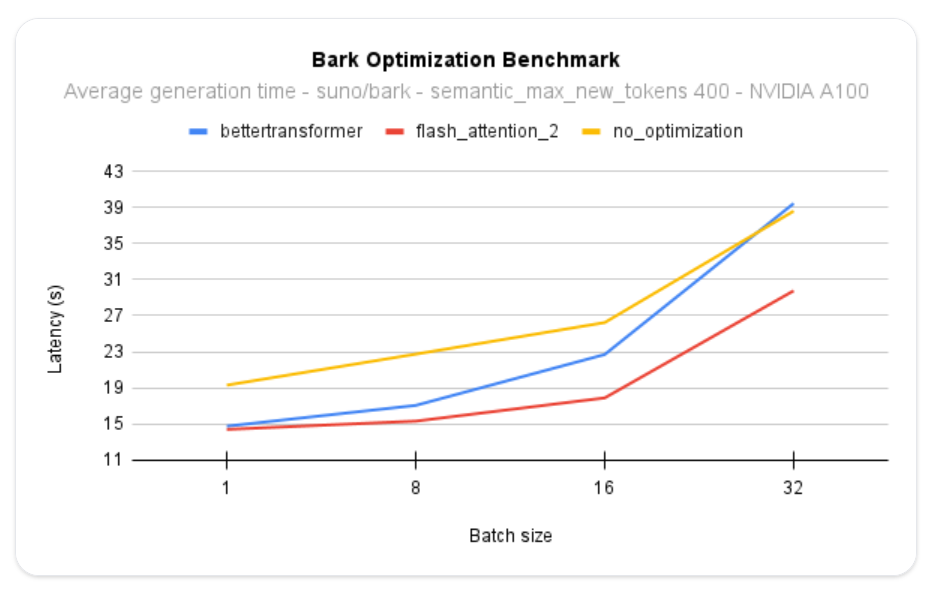

To put this into perspective, on an NVIDIA A100 and when generating 400 semantic tokens with a batch size of 16, you can get 17 times the throughput and still be 2 seconds faster than generating sentences one by one with the native model implementation. In other words, all the samples will be generated 17 times faster.

At batch size 8, on an NVIDIA A100, Flash Attention 2 is also 10% faster than Better Transformer, and at batch size 16, 25%.
Combining optimization techniques

You can combine optimization techniques, and use CPU offload, half-precision and Flash Attention 2 (or 🤗 Better Transformer) all at once.

In [5]:
from transformers import BarkModel
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# load in fp16 and use Flash Attention 2
model = BarkModel.from_pretrained("suno/bark-small", torch_dtype=torch.float16, attn_implementation="flash_attention_2").to(device)

# enable CPU offload
model.enable_cpu_offload()

TypeError: BarkModel._check_and_enable_flash_attn_2() got an unexpected keyword argument 'check_device_map'

Find out more on inference optimization techniques here.
Usage tips

Suno offers a library of voice presets in a number of languages here. These presets are also uploaded in the hub here or here.

In [6]:
from transformers import AutoProcessor, BarkModel

processor = AutoProcessor.from_pretrained("suno/bark")
model = BarkModel.from_pretrained("suno/bark")

voice_preset = "v2/en_speaker_6"

inputs = processor("Hello, my dog is cute", voice_preset=voice_preset)

audio_array = model.generate(**inputs)
audio_array = audio_array.cpu().numpy().squeeze()

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

speaker_embeddings_path.json:   0%|          | 0.00/61.1k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/8.81k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/4.49G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


generation_config.json:   0%|          | 0.00/4.91k [00:00<?, ?B/s]

en_speaker_6_semantic_prompt.npy:   0%|          | 0.00/2.60k [00:00<?, ?B/s]

en_speaker_6_coarse_prompt.npy:   0%|          | 0.00/7.55k [00:00<?, ?B/s]

en_speaker_6_fine_prompt.npy:   0%|          | 0.00/15.0k [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


RuntimeError: "LayerNormKernelImpl" not implemented for 'Half'

Bark can generate highly realistic, multilingual speech as well as other audio - including music, background noise and simple sound effects.

In [7]:
# Multilingual speech - simplified Chinese
inputs = processor("惊人的！我会说中文")

# Multilingual speech - French - let's use a voice_preset as well
inputs = processor("Incroyable! Je peux générer du son.", voice_preset="fr_speaker_5")

# Bark can also generate music. You can help it out by adding music notes around your lyrics.
inputs = processor("♪ Hello, my dog is cute ♪")

audio_array = model.generate(**inputs)
audio_array = audio_array.cpu().numpy().squeeze()

fr_speaker_5_semantic_prompt.npy:   0%|          | 0.00/4.45k [00:00<?, ?B/s]

fr_speaker_5_coarse_prompt.npy:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

fr_speaker_5_fine_prompt.npy:   0%|          | 0.00/26.1k [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


RuntimeError: "LayerNormKernelImpl" not implemented for 'Half'